# Machine Learning and Computer Vision
## Assigment 5

---

This assignment contains 2 programming exercises.


## Problem 1: Template Matching

Template matching is a naive technique for object detection and recognition in an image. It makes use of normalized cross correlation (NCC), which is a very similar operation to convolution. The differences between NCC and convolution are subtle3; you can think of it as a modified convolution. Follow the four steps to perform template matching on two different images:

(i) Correlation by Convolution: Using the Letter.jpg and LetterTemplate.jpg perform the following steps to find the template in the original image.

• Convert both image and template to grayscale, double type.

• Flip LetterTemplate.jpg vertically and horizontally.

• Convolve the Letter.jpg and LetterTemplate.jpg.

• Find the maximum point of the resulting convolved image. This is the location of the template match in the original image.

• Draw a rectangle (using matplotlib.patches.rectangle() or cv2.rectangle()) over the original image centered at the location where the template match occurred. The size of this rectangle is the same as the template.

(ii) Normalized Cross Correlation: try to use functions like skimage.feature.match_template() to performs a normalized cross correlation. It returns a correlation matrix that can be interpreted as an image. The maximum value of this image represents the location of the largest correlation between the image and the template. Repeat the process in (i) using Normalized Cross Correlation instead of convolution, and compare their result.


(iii) Multiple Matches: Now use Cross Correlation to detect faces in crowd.jpg using face1.jpeg as a template. This time instead of finding the maximum value in the correlation matrix, use a percentage of the maximum as the threshold to detect multiple faces instead of just the best match. Draw rectangles over the original image to indicate where the template matches occurred.

(iv) Multiple Templates: Repeat part (iii), but this time use all three templates, face1.jpeg, face2.jpeg and face3.jpeg, to generate three separate correlation matrices. Use each of the three to detect multiple face orientations in the crowd. Draw rectangles over the original image to indicate where the template matches occur (for all three templates). Make sure you use rectangles of different colors to represent matches corresponding to different templates.

Things to turn in:

• Part (i): image after convolution (use imagesc()) and original image with rectangle depicting template match.

• Part (ii): image after Cross Correlation (use imagesc()) and original image with rectangle depicting template match.

• Part (iii): image after Cross Correlation (use imagesc()) and original image with rectangles depicting template matches. Also mention NCC threshold used to detect faces.

• Part (iv): images after Cross Correlation (use imagesc()) and original image with rectangles depicting template matches (color coded for each template).



(256, 256)
(334, 1000, 3)


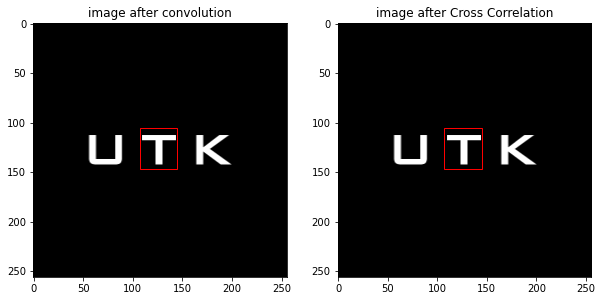

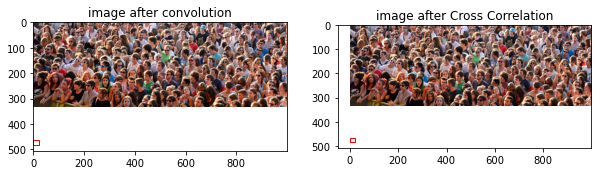

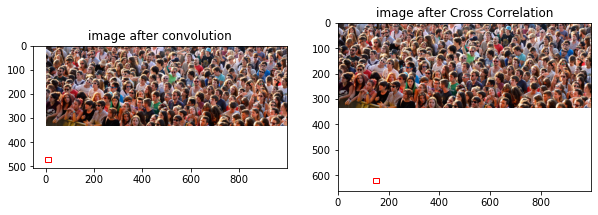

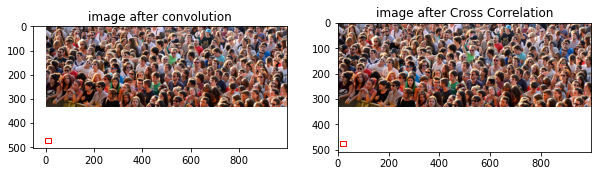

In [8]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import scipy as sci

np.set_printoptions(threshold=np.inf)

#Function 1
#Function for convert image to grayscale double type
def convert(image):
    image_converted = np.double(image)
    return image_converted

#Function for flipping
def flip(image):
    image_flip = np.flipud(np.fliplr(image))
    return image_flip

#Function for correlation by convolution 
'''
Edition 1
def correlation_by_convolution(image, template):
    tmp_flip = flip(template)
    
    img_fft = np.fft.fft2(img)
    tmp_flip_fft = np.fft.fft2(tmp_flip)
    
    frequence_multi = np.multiply(img_fft, tmp_flip_fft)
    img_convolution = np.fft.ifft2(frequence_multi)
    
    max_location = numpy.where(img_convolution == numpy.amax(img_convolution))
    
    return max_location
'''
def correlation_by_convolution(image, template):
    img_convolution = sci.signal.convolve(image, template)
            
    max_location = np.where(img_convolution == np.amax(img_convolution))
    return max_location

#Function2
#Function for normalization
def normalization(image):
    img_mean = np.full(image.shape, np.mean(img))
    img_delta = np.subtract(image, img_mean)
    img_fraction = np.sqrt(np.sum(np.square(img_delta)))
    img_norm = np.divide(img_delta, img_fraction)
    return img_norm

#Function for correlation by convolution 
def correlation_by_convolution_normalized(image, template):
    img_norm = normalization(image)
    template_norm = normalization(template)
    
    max_location = correlation_by_convolution(img_norm, template_norm)
    return max_location

#Function for plot 
def plot(image, template):
    import matplotlib.pyplot as plt
    from scipy import signal
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    
    tmp = convert(template)
    tmp = flip(tmp)
    img = image
    height = tmp.shape[0]
    width = tmp.shape[1]
    
    ax[0].imshow(img, cmap=plt.cm.gray)
    location = correlation_by_convolution(img, tmp)
    rect = ptch.Rectangle((location[0] - height, location[1] - width) , height, width, linewidth=1, edgecolor='r', facecolor='none')
    ax[0].add_patch(rect)
    ax[0].set_title('image after convolution')
    ax[0].axis('image')
    
    ax[1].imshow(img, cmap=plt.cm.gray)
    location = correlation_by_convolution_normalized(img, tmp)
    rect = ptch.Rectangle((location[0]-height, location[1]-width ) , height, width, linewidth=1, edgecolor='r', facecolor='none')
    ax[1].add_patch(rect)
    ax[1].set_title('image after Cross Correlation')
    ax[1].axis('image')
    

#Import image here
# Convert to Gray scale image, select Threshold
# Sample call#
img = imread('Letters.jpg')
tmp = imread('LettersTemplate.jpg')
threshold = 0.5

plot(img, tmp)
print(img.shape)

img = imread('crowd.jpg')
tmp3 = imread('face1.jpeg')
tmp1 = imread('face2.jpeg')
tmp2 = imread('face3.jpeg')

print(img.shape)
plot(img, tmp1)
plot(img, tmp2)
plot(img, tmp3)

## Problem 2  K-Means Segmentation
In this problem, we shall implement a K-Means based segmentation algorithm from scratch. To do this, you are required to implement the following three functions -

• def createDataset(im): This function takes in an RGB image as input, and returns a dataset of features which are to be clustered. The function returns features, which is an N × M matrix where N is the number of pixels in the image im, and M = 3 (to store the RGB value of each pixel).

• def kMeansCluster(features, centers): This function is intended to perform K-Means based clustering on the dataset features (of size N × M). The function returns a list [idx, centers]. Each row in features represents a data point, and each column represents a feature. centers is a k × M matrix, where each row is the initial value of a cluster center. The output idx is an N × 1 vector that stores the final cluster membership (∈ 1, 2, · · · , k) of each data point. The output centers are the final cluster centers after K-Means. Note that you may need to set a maximum iteration count to exit K-Means in case the algorithm fails to converge. You may use loops in this function.

• def mapValues(im, idx): This function takes in the cluster membership vector idx (N × 1), and returns the segmented image im_seg as the output. Each pixel in the segmented image must have the RGB value of the cluster center to which it belongs. You may use loops for this part.

With the above functions set up, perform image segmentation on the image white-tower.png, with the number of clusters, nclusters = 7. To maintain uniformity in the output image, please initialize clusters centers for K-Means as follows - 

    np.random.seed(5)

    nclusters = 7

    features = createDataset(im)

    id = np.random.randint(np.shape(features)[0], size=(1, nclusters))

Cluster Center points will be the corresponding row of each id value in features. 

Things to turn in:

• The input image, and the image after segmentation.

• The final cluster centers that you obtain after K-Means.

In [15]:
#K mean segmentation Function
def createDataset(im):
    features = np.reshape(im,(im.shape[0]*im.shape[1], 3))
    return features


def kMeansCluster(features, centers):
    from scipy.spatial import distance
    #Function that is useful, cdist(), argmin(), np.mean(), np.array_equal()
    centers_old = np.zeros(centers.shape)
    m = 0
    distances = np.zeros((centers.shape[0], features.shape[0]))
    new_center = np.zeros((centers.shape[0], 1))
    idx = np.zeros((features.shape[0], 1))
    
    while (np.subtract(centers, centers_old) < 5).all:
        m += 1
        centers_old = centers
        
        
        distances = distance.cdist(centers, features, 'euclidean')
        minium = np.argmin(distances, axis=0)
            
        for i in range(centers.shape[0]):
            n = 0
            sum = 0
            for j in range(minium.shape[0]):
                if ( minium[j] == i ):
                    sum = sum + j       
                    n = n + 1
                if (n == 0):
                    new_center[i] = sum
                else:
                    new_center[i] = sum/n
                    idx_value = int(new_center[i])
                    centers[i][:] = features[idx_value][:]
                    
    idx = np.reshape(minium,(-1,1))           
    return [idx,centers]

def mapValues(im, idx, centers):
    height = im.shape[0]
    width = im.shape[1]
    
    for i in range(idx.shape[0]):
        im[int(i/width), i%width, :] = centers[idx[i], :]
        
    return im


In [ ]:
# import numpy as np
from imageio import imread
from scipy.spatial import distance
import matplotlib.pyplot as plt
import matplotlib.patches as ptch

#load image
img = imread('white-tower.png')

#Initialize
np.random.seed(5)

nclusters = 7

features = createDataset(img)

idx = np.random.randint(np.shape(features)[0], size=(1, nclusters))

centers = np.zeros((nclusters, features.shape[1]))

for i in range(idx.shape[1]):
    a = idx[0][i]
    centers[i, :] = features[a, :]
#Sample call and plot 
plt.imshow(img)

idx,centers = kMeansCluster(features, centers)

print(centers)

img_segm = mapValues(img, idx, centers)

print(img_segm)
plt.imshow(img_segm)

## Conclusion

Have you accomplished all parts of your assignment? What concepts did you used or learned in this assignment? What difficulties have you encountered? Explain your result for each section. Please wirte one or two short paragraph in the below Markdown window (double click to edit).

**** Your Conclusion: ****

--




---
** Submission Instructions**  
Remember to submit you pdf version of this notebook to Gradescope. You can find the export option at File $\rightarrow$ Download as $\rightarrow$ PDF via LaTeX